## Analysis of New York Airbnb data 

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [62]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




## Loading Dataset

In [63]:
listings = pd.read_csv('data/airbnb_nyc.csv')

In [64]:
pd.set_option('display.max_columns', None)
listings.head() #display first five rows 

,id,name,summary,description,experiences_offered,neighborhood_overview,transit,house_rules,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
0,2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,Very close to F and G trains and Express bus i...,-The security and comfort of all our guests is...,2787,39698.0,within an hour,1.0,0.0,6.0,1.0,"Brooklyn , NY, United States",Brooklyn,40.64749,-73.97237,Apartment,Private room,2,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",149,1,35,1,3 weeks ago,1,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,6,0,5,1,0.21,1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,1
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,Upon arrival please have a legibile copy of yo...,4632,39777.0,within a day,1.0,0.0,1.0,1.0,"New York, NY, United States",Harlem,40.80902,-73.94190,Apartment,Private room,2,1.0,1,1,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",150,2,20,3,34 months ago,1,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,1,0,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,7750,Huge 2 BR Upper East Cental Park,NaN,Large Furnished 2BR one block to Central Park...,none,NaN,NaN,NaN,17985,39953.0,within a day,1.0,0.0,2.0,1.0,"New York, NY, United States",Harlem,40.79685,-73.94872,Apartment,Entire home/apt,4,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",190,1,0,7,7 weeks ago,1,4,14,14,249,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,2,1,1,0,NaN,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1
3,8505,Sunny Bedroom Across Prospect Park,Just renovated sun drenched bedroom in a quiet...,Just renovated sun drenched bedroom in a quiet...,none,Quiet and beautiful Windsor Terrace. The apart...,Ten minutes walk to the 15th sheet F&G train s...,- No shoes in the house - Quiet hours after 11...,25326,40006.0,within an hour,1.0,1.0,2.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.65599,-73.97519,Condominium,Private room,2,1.0,1,1,Real Bed,"{Wifi,""Air conditioning"",""Free street parking""...",60,1,20,1,2 months ago,1,25,55,85,85,19,17,97.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,2,1,1,0,1.37,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,8700,Magnifique Suite au N de Manhattan - vue Cloitres,Suite de 20 m2 a 5 min des 2 lignes de metro a...,Suite de 20 m2 a 5 min des 2 lignes de metro a...,none,NaN,Metro 1 et A,NaN,26394,40014.0,NaN,NaN,0.0,1.0,1.0,"New York, NY, United States",Manhattan,40.86754,-73.92639,Apartment,Private room,2,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",80,1,20,4

## Dataset Cleaning and Preprocessing

## Check dtype of columns to see if any variables need changing for future analysis

In [65]:
 listings.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

## Checking for missing values

In [66]:
listings.isnull().sum()

id                                                  0
name                                               13
summary                                          1218
description                                       604
experiences_offered                                 0
neighborhood_overview                           12066
transit                                         11989
house_rules                                     13556
host_id                                             0
host_since                                          9
host_response_time                              13097
host_response_rate                              13097
host_is_superhost                                   9
host_listings_count                                 9
host_identity_verified                              9
street                                              0
neighbourhood                                       9
latitude                                            0
longitude                   

## Several columns have many missing values, among which the ones that concerns reviews. Because these will be important for the analysis, they will be kept. However, the missing values will be replaced with the mean of that column.

##  Other columns which won't be relevant for the analysis will be removed (e.g. summary, description).

In [67]:
listings['reviews_per_month'].fillna(listings['reviews_per_month'].mean(),inplace=True)
listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean(),inplace=True)
listings['review_scores_accuracy'].fillna(listings['review_scores_accuracy'].mean(),inplace=True)
listings['review_scores_cleanliness'].fillna(listings['review_scores_cleanliness'].mean(),inplace=True)
listings['review_scores_checkin'].fillna(listings['review_scores_checkin'].mean(),inplace=True)
listings['review_scores_communication'].fillna(listings['review_scores_communication'].mean(),inplace=True)
listings['review_scores_location'].fillna(listings['review_scores_location'].mean(),inplace=True)
listings['review_scores_value'].fillna(listings['review_scores_value'].mean(),inplace=True)


listings.drop(columns=['summary', 'neighborhood_overview', 'transit', 'house_rules',
                    'host_response_time', 'host_response_rate'], axis=1, inplace=True)
listings.isnull().sum()

id                                                0
name                                             13
description                                     604
experiences_offered                               0
host_id                                           0
host_since                                        9
host_is_superhost                                 9
host_listings_count                               9
host_identity_verified                            9
street                                            0
neighbourhood                                     9
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms                                         0
bedrooms                                          0
beds                                              0
bed_type    

## Exploratory Data Analysis

## Correlation

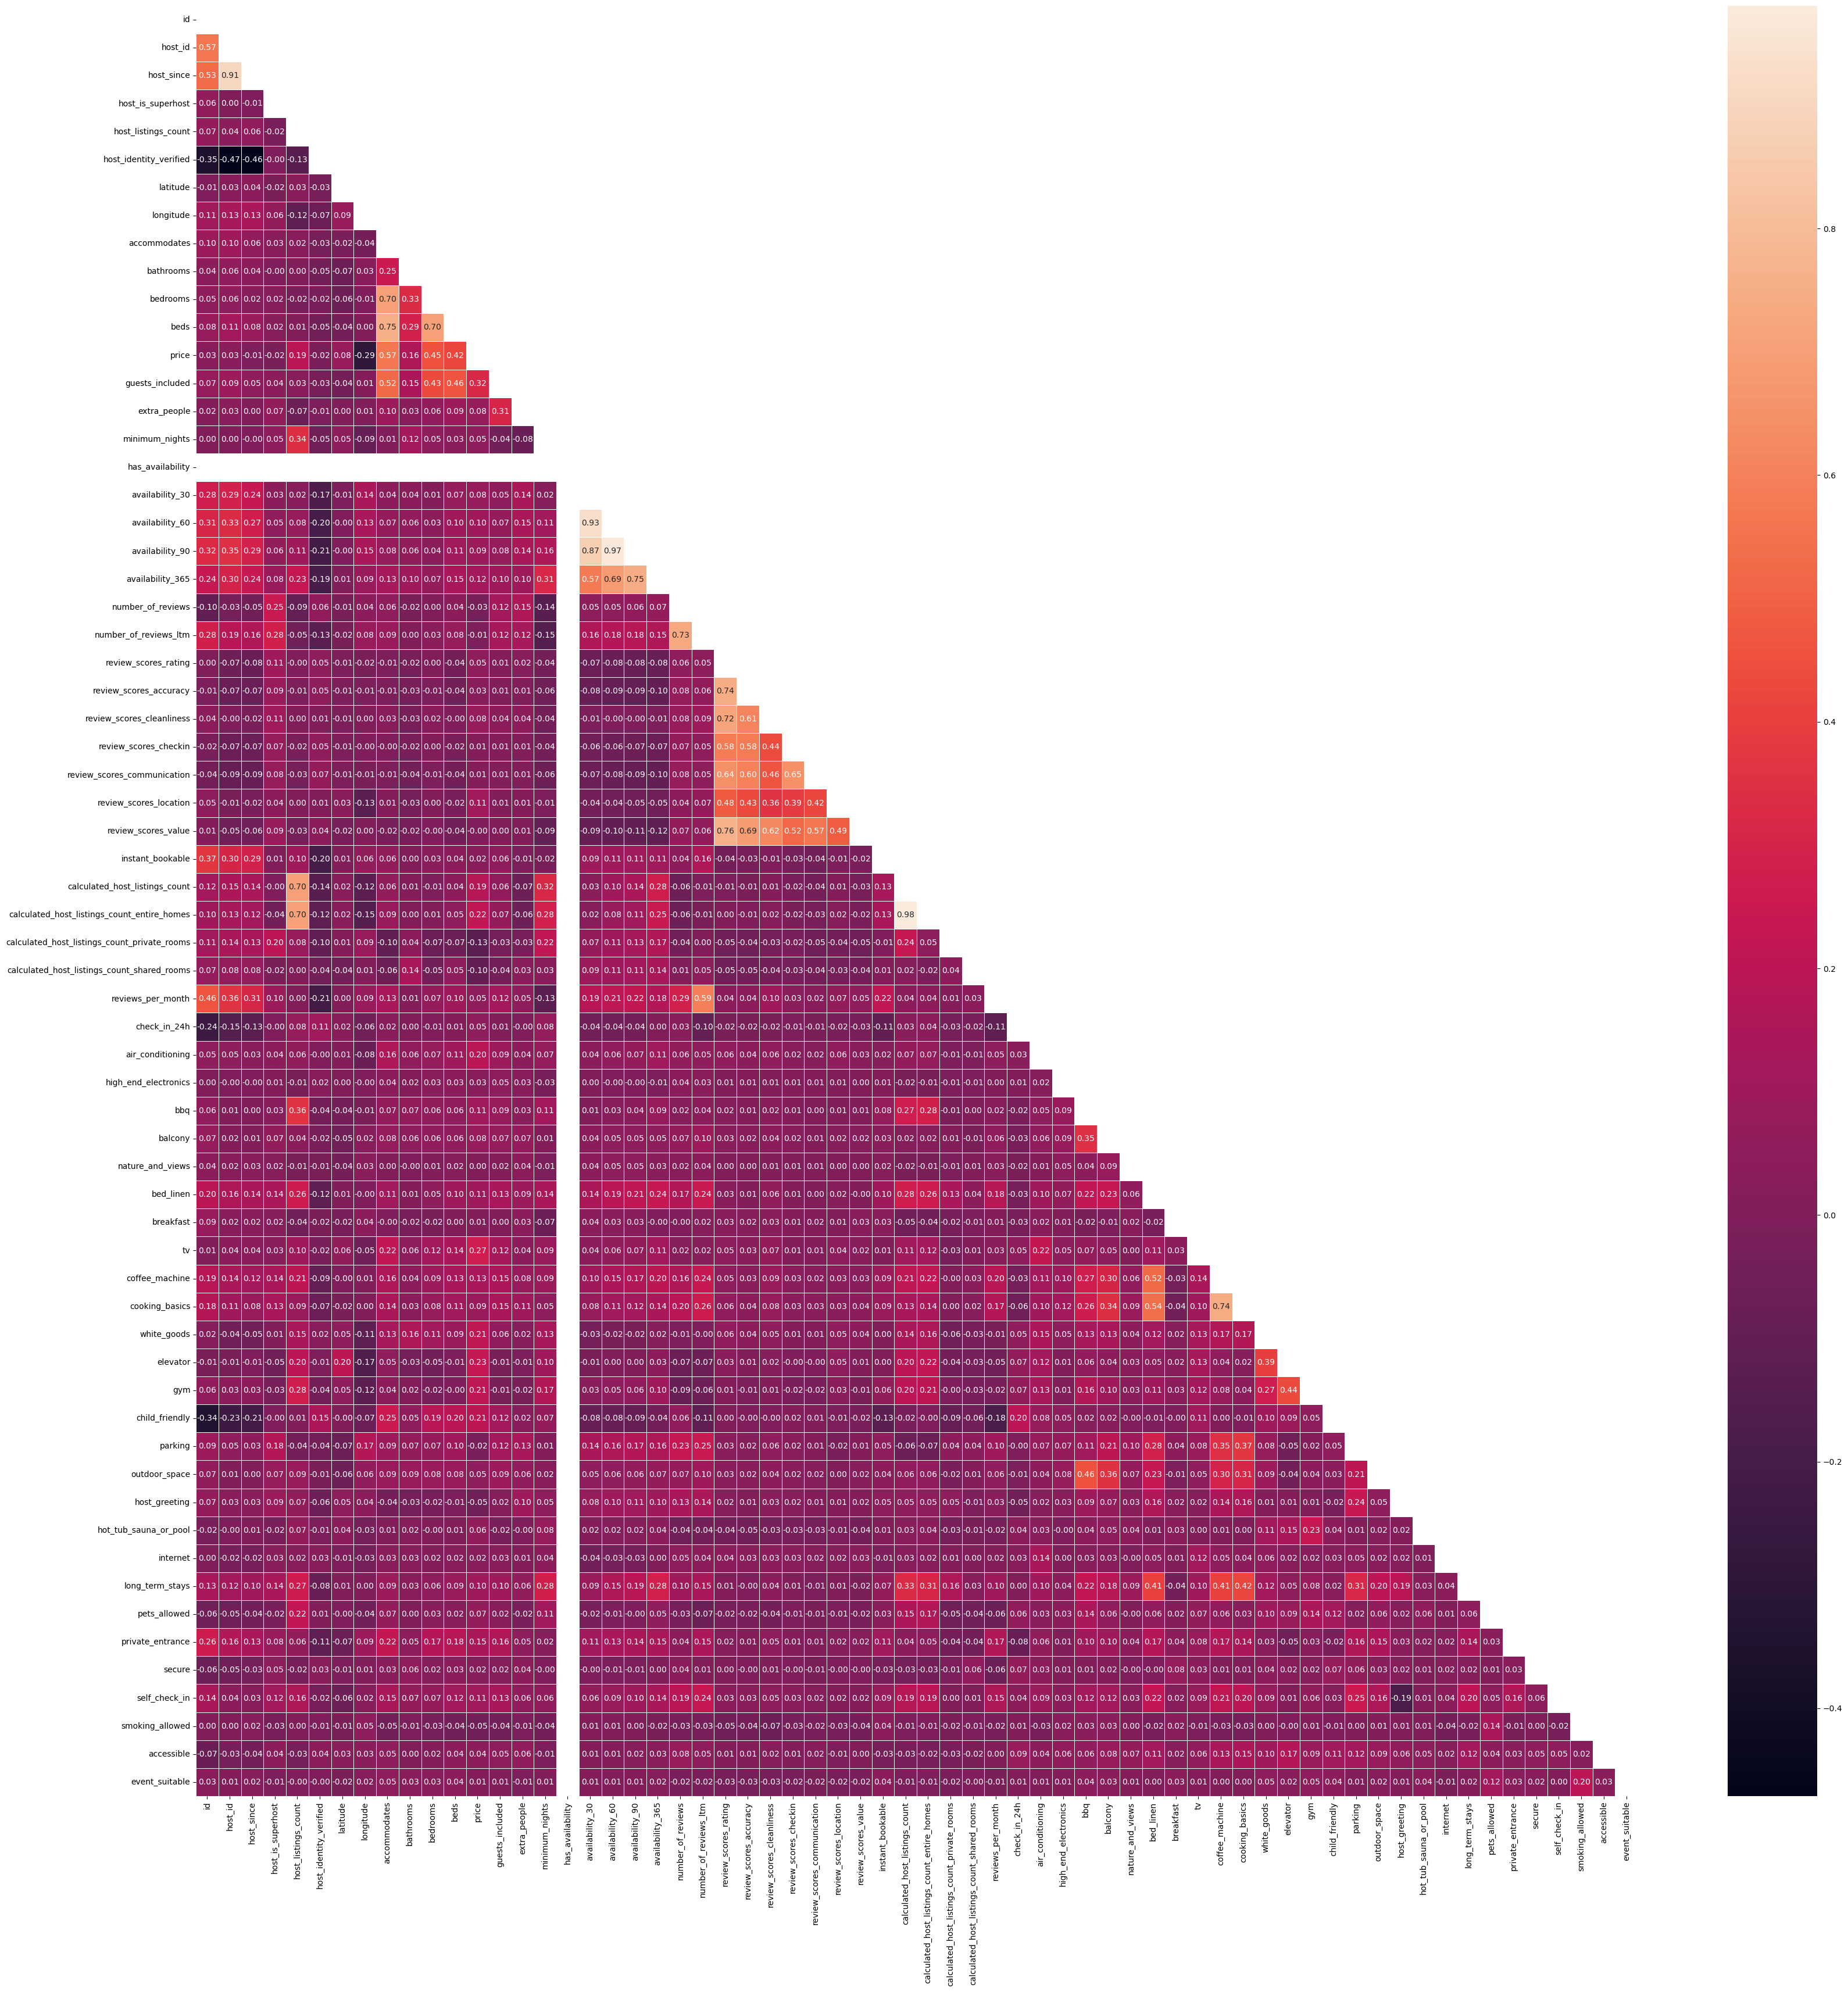

In [68]:
corr_1 = listings.corr()
fig, ax = plt.subplots(figsize=(40, 40))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Correlation heatmap shows high correlation between:
## 1. beds and price 
## 2. bedrooms and price
## 3. accomodate and price 

## availability 30 and availability 60, 90, 365
## availability 60 and availability 90, 365
## availability 90 and availability 365


## Relation between bedrooms and price 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

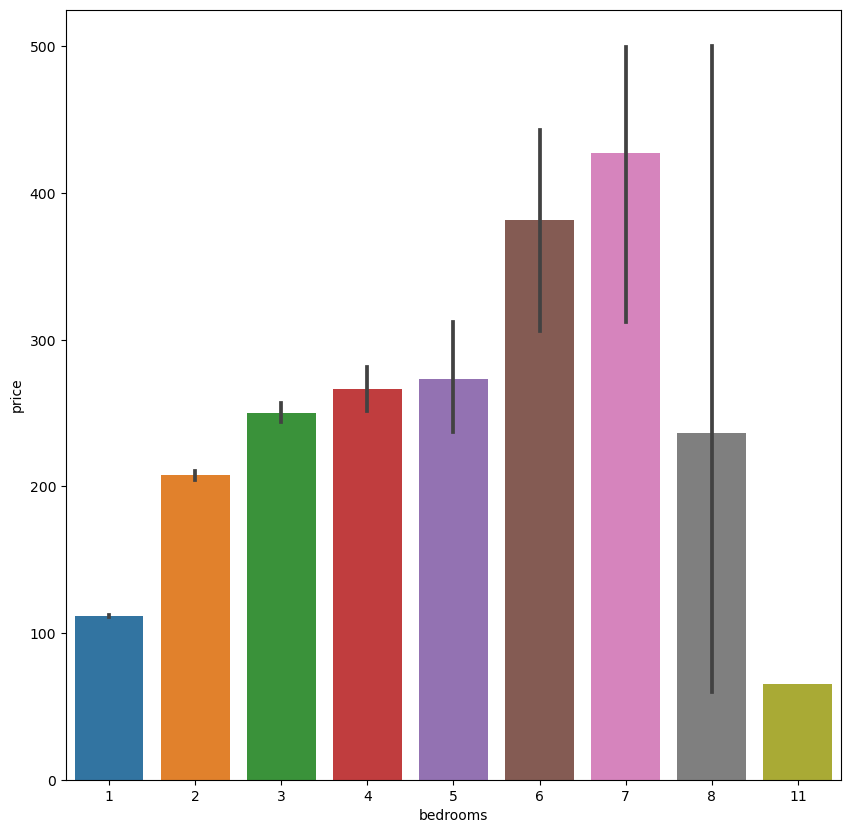

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data = listings, x = 'bedrooms', y = 'price')

In [70]:
# check which room has x11 bedrooms 

listings.loc[listings['bedrooms'] == 11]

,id,name,description,experiences_offered,host_id,host_since,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
16529,23124338,New York Guests House,"Beautiful peaceful, quiet, clean 11 private r...",none,171830071,43136.0,0.0,1.0,1.0,"Bronx, NY, United States",The Bronx,40.85662,-73.89797,Guesthouse,Private room,16,2.0,11,21,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",65,3,50,2,16 months ago,1,0,0,0,0,5,0,75.0,8.0,9.0,9.0,8.0,8.0,8.0,1,strict_14_with_grace_period,1,0,1,0,0.3,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [71]:
listings.loc[listings['bedrooms'] ==  7 & 6 & 5]

,id,name,description,experiences_offered,host_id,host_since,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
101,165080,Amazing Brownstone in Best Brooklyn,Our architect-designed townhouse is an urban o...,none,787273,40730.0,0.0,1.0,1.0,"Brooklyn, NY, United States",Brooklyn,40.68090,-73.99233,House,Entire home/apt,10,2.5,4,5,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",500,6,50,7,8 months ago,1,0,0,0,0,7,3,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0,strict_14_with_grace_period,1,1,0,0,0.070000,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
273,439870,"Gorgeous Park Slope, BK triplex 4BD",A beautiful Brooklyn Townhouse in one of Brook...,none,1903758,40979.0,0.0,1.0,1.0,"Brooklyn, NY, United States",Brooklyn,40.66859,-73.98235,Townhouse,Entire home/apt,5,2.0,4,4,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",299,4,50,20,3 days ago,1,6,36,66,149,0,0,93.643975,9.567543,9.192049,9.694252,9.713275,9.553476,9.369851,0,strict_14_with_grace_period,1,1,0,0,0.797324,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1
279,452068,"Spacious 4 bedroom house, New York",Our 3-floor house with private backyard is clo...,none,2246071,41027.0,0.0,1.0,1.0,"Brooklyn, NY, United States",Brooklyn,40.64205,-73.97173,House,Entire home/apt,5,1.5,4,4,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200,1,0,1,43 months ago,1,0,0,0,0,3,0,100.000000,8.000000,10.000000,10.000000,8.000000,9.000000,10.000000,0,moderate,1,1,0,0,0.060000,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
311,496166,"Beautiful, Spacious 4 BR Brooklyn Brownstone",A wonderful place to stay if you're traveling ...,none,2450665,41052.0,0.0,1.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.66641,-73.98283,House,Entire home/apt,8,2.5,4,4,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",249,4,75,3,6 days ago,1,7,12,12,26,12,7,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,strict_14_with_grace_period,1,1,0,0,0.270000,-1,1,1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,-1,-1,-1
336,523123,Tranquility & convenience in Bklyn,Beautiful and serene modern home with lots of ...,none,2572253,41067.0,0.0,1.0,1.0,"Brooklyn, NY, United States",Park Slope,40.66051,-73.98495,Townhouse,Entire home/apt,6,2.0,4,4,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",375,1,0,5,a week ago,1,14,29,32,43,19,3,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,strict_14_with_grace_period,1,1,0,0,0.230000,-1,1,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1
402,625197,"Williamsburg, Brooklyn Townhouse","Families Preferred Family-friendly, totally mo...",none,1974637,40988.0,0.0,1.0,1.0,"Brooklyn, NY, United States",Brooklyn,40.71455,-73.93739,House,Entire home/apt,6,2.0,4,4,Real Bed,"{TV,Wifi,""Air conditioning"

## The price for accomodations is related to the location more than the number of rooms. That is to say, the most expensive accomodations are in more wealthy areas of New York. However, when comparing prices for wealthy locations based on number of rooms, it is possible to see a correlation. 

In [72]:
listings.loc[listings['beds'] > 20]

,id,name,description,experiences_offered,host_id,host_since,host_is_superhost,host_listings_count,host_identity_verified,street,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable
13528,20001157,CROWN HEIGHTS GUEST HOUSE 2R2L3R3L,Lots of windows and lots of sunlight. Private ...,none,74541079,42519.0,0.0,10.0,0.0,"Brooklyn, NY, United States",Brooklyn,40.67077,-73.93618,Townhouse,Entire home/apt,16,4.0,4,22,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",399,14,15,4,3 days ago,1,15,35,65,65,5,4,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,9,9,0,0,0.39,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,-1,1,-1,-1,-1
15049,21723212,CROWN HEIGHTS GUEST HOUSE 2R2L3R3L+B,Lots of windows and lots of sunlight. Private ...,none,74541079,42519.0,0.0,10.0,0.0,"Brooklyn, NY, United States",Crown Heights,40.66911,-73.93666,Townhouse,Entire home/apt,16,5.0,6,26,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",459,16,5,4,3 days ago,1,15,35,65,87,1,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,9,9,0,0,1.00,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,1,-1,-1,-1
16529,23124338,New York Guests House,"Beautiful peaceful, quiet, clean 11 private r...",none,171830071,43136.0,0.0,1.0,1.0,"Bronx, NY, United States",The Bronx,40.85662,-73.89797,Guesthouse,Private room,16,2.0,11,21,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",65,3,50,2,16 months ago,1,0,0,0,0,5,0,75.0,8.0,9.0,9.0,8.0,8.0,8.0,1,strict_14_with_grace_period,1,0,1,0,0.30,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


## When taking the number of beds into consideration, it is still possible to see that this becomes only a relevant factor when comparing accomodation within the same area. In fact, the house in Bronx offers the greatest number of beds, but it is still the chepest option. On the other hand, the two accomodations in Brooklyin come to a price of $ 399 - $ 459 respectively.

<AxesSubplot:xlabel='beds', ylabel='price'>

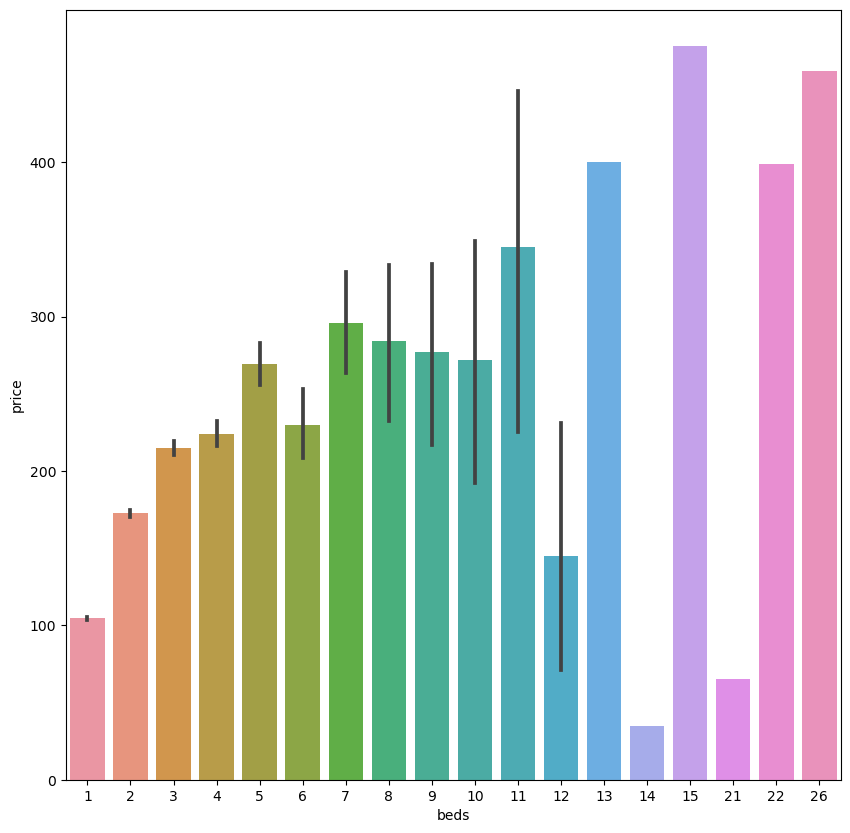

In [73]:
plt.figure(figsize=(10,10))
sns.barplot(data = listings, x = 'beds', y = 'price')

## Check price by neighbour 

In [74]:
price_by_neighbourhood = listings.groupby("neighbourhood")['price'].mean() 
pd.options.display.max_rows = 999
price_by_neighbourhood
price_by_neighbourhood[price_by_neighbourhood > 200]


neighbourhood
Chelsea                          212.677116
Cobble Hill                      232.727273
DUMBO                            204.875000
Financial District               223.589831
Flatiron District                249.470588
Hudson Square                    207.857143
Meatpacking District             208.250000
Midtown                          210.866123
Midtown East                     215.100917
Murray Hill                      214.597222
Noho                             257.727273
Nolita                           212.333333
Soho                             213.520000
Times Square/Theatre District    202.950000
Tribeca                          252.769231
West Village                     221.954315
Name: price, dtype: float64

## Neighbourhoods with mean prices > 200 are places such as Noho, Coobble Hill and Flariton District

<AxesSubplot:xlabel='price', ylabel='Count'>

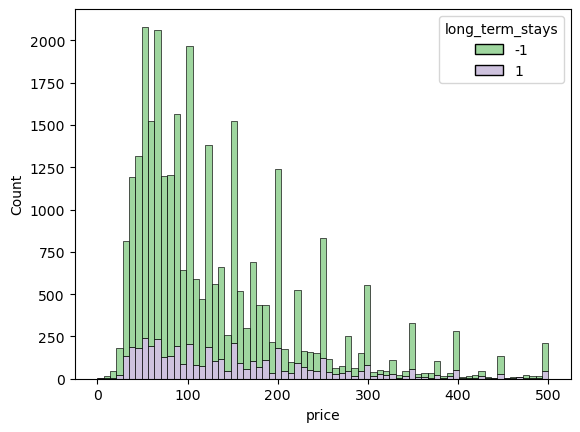

In [75]:
sns.histplot(data = listings, x= 'price', hue= 'long_term_stays', multiple = 'stack',
            palette = 'Accent')

## The graph above also shows that long-term stay accomodations have higher prices than short - term ones (as well as being in greater numbers)

In [76]:
listings[['price', 'bedrooms']].corr()

,price,bedrooms
price,1.000000,0.454539
bedrooms,0.454539,1.000000


## Use Latitude and Longitude to check distribution of price on map of New York 

In [77]:
import folium

In [78]:
from folium.plugins import HeatMap

folium_map = folium.Map(
    location = [mean_latitude, mean_longitude],
    titles = 'OpenStreetMap',
    zoom_start = 10
)


heatmap_list = listings[['latitude', 'longitude', 'price']]
heatmap_list = heatmap_list.dropna()

HeatMap(
    heatmap_list,
    min_opacity = 0.2,
    radius = 8,
    blur = 6
).add_to(folium_map)

folium_map

NameError: name 'mean_latitude' is not defined

In [ ]:
!pip install wordcloud

## Analysis of the names of the listings

In [ ]:
#word cloud

from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in listings.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

## The word cloud shows the words that are more often used in the name of this listings. We can see that most of the words are related to the location and descriptors for the accomodation. 

## Analysis of the number of reviews

In [ ]:
plt.figure(figsize=(8,8))
listings.plot(x ='number_of_reviews', y = 'price', kind = 'hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

## From this histograms we can see that low costs accomodations $50-200 have a higher number of reviews, contrary to expensive ones. This shows that people who pay more for the rooms generally don't write reviews. This could be linked to the fact that cheapers accomodations more likely to present problems to guests and that people feel in need to reassure future lodgers about the conditions. 

## References

"New York", Inside Airbnb, http://insideairbnb.com/get-the-data.html

